# Numerical condition analysis, investment payoff concern

In [1]:
# Imports, magics etc.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Equilibrium 1: Follow signal

*Herding deviation incentive condition*

\begin{align}
    \lambda \theta - C &> \left( \theta p + (1-\theta)\frac{1}{2} \right) \lambda \frac{2 \theta (1+\theta) p}{4 \theta p + (1-\theta)^2} \notag \\
    & \qquad + \left( \theta (1-p) + (1-\theta)\frac{1}{2} \right) \lambda \frac{2\theta(1+\theta)(1-p)}{(1+\theta)^2 - 4\theta p} - \frac{1}{2}(1-\theta^2)(1-\lambda)k \label{eq3:BLearnDeviateHerd}
\end{align}

*Anti-herding deviation incentive condition*

\begin{align}
    C < \lambda \frac{2 \theta^2 \left(1-2(1-p)p \right)}{1+\theta} + \theta(2p-1)(1-\lambda)z - \frac{1}{2}(1+\theta^2)(1-\lambda)k \label{eq3:BLearnDeviateAntiHerd}
\end{align}

*A learning incentive condition*

\begin{align}
& \lambda \theta - \frac{\theta^2}{2}(1-\lambda)k - C > \left( \theta p + (1-\theta)\frac{1}{2} \right) \lambda \left( \frac{\theta (1+\theta) p}{4 \theta p  + (1-\theta)^2} + \frac{\theta (1-p)}{1+\theta} \right) \notag \\
    & \qquad + \left( \theta (1-p) + (1-\theta)\frac{1}{2} \right) \lambda \left( \frac{\theta(1+\theta)(1-p)}{(1+\theta)^2 - 4\theta p} + \frac{\theta p}{1+\theta} \right)
\end{align}

In [2]:
def follow_signal(C_mesh, k_mesh, z=1, theta=0.5, lambda_val=0.5, p=0.85):
    # INPUT:
    # - C_mesh: mesh grid values of C
    # - k_mesh: mesh grid values of k
    # - z: value of normalized parameter z
    # - theta: value of theta
    # - lambda_val: value of lambda
    # - p: value of p
    
    C = C_mesh
    k = k_mesh
    
    # Deviation conditions
    def cond_dev_herd(): return lambda_val*theta-C > (theta*p+(1-theta)*0.5)*lambda_val*((2*theta*(1+theta)*p) / (4*theta*p+(1-theta)**2)) \
                        + (theta*(1-p)+(1-theta)*0.5)*lambda_val*((2*theta*(1+theta)*(1-p)) / ((1+theta)**2-4*theta*p)) \
                        - 0.5*(1-theta**2)*(1-lambda_val)*k
    
    def cond_dev_antiherd(): return C < lambda_val*((2*theta**2*(1-2*(1-p)*p)) / (1+theta)) + theta*(2*p-1)*(1-lambda_val)*z \
                        - 0.5*(1+theta**2)*(1-lambda_val)*k
    
    def cond_A_learn(): return lambda_val*theta - theta**2/2*(1-lambda_val)*k - C > \
                        (theta*p+(1-theta)*0.5)*lambda_val*((theta*(1+theta)*p) / (4*theta*p + (1-theta)**2) + (theta*(1-p)) / (1+theta)) \
                        + (theta*(1-p) + (1-theta)*0.5)*lambda_val*((theta*(1+theta)*(1-p)) / ((1+theta)**2-4*theta*p) + (theta*p) / (1+theta))
    
    return cond_dev_herd() & cond_dev_antiherd() & cond_A_learn() == True # True if both conditions are true

## Equilibrium 2: Herding

*Learning deviation incentive condition*

\begin{align}
& C > \frac{\lambda \theta^2(\theta-1)}{2} + \frac{1}{2}(1-\theta^2)(1-\lambda)k
\end{align}

*Anti-herding deviation incentive condition*

\begin{align}
& (1-\lambda)z > \lambda \frac{2\theta(2p(1-p)-1)}{(1+\theta)(2p-1)} + \frac{(1-\lambda)}{\theta(2p-1)}k
\end{align}

*A learning incentive condition*

\begin{align}
& C < \theta(2p-1)(1-\lambda)z + \lambda \phi , \quad \phi \equiv\theta - \frac{-4\theta^2p^2 + 4\theta^2 p + \theta - \theta^2}{(2\theta p + 1-\theta)(1+\theta -2\theta p)}
\end{align}

In [3]:
def herd(C_mesh, k_mesh, z=1, theta=0.5, lambda_val=0.5, p=0.85):
    
    C = C_mesh
    k = k_mesh
    
    # Deviation conditions 
    def cond_dev_learn(): return C > (lambda_val*theta**2*(theta-1))/2 + 0.5*(1-theta**2)*(1-lambda_val)*k

    def cond_dev_antiherd(): return (1-lambda_val)*z > lambda_val * (2*theta*(2*p*(1-p)-1)) / ((1+theta)*(2*p-1)) \
                                    + (1-lambda_val) / (theta*(2*p-1)) * k

    def cond_A_learn(): return C < theta*(2*p-1)*(1-lambda_val)*z + lambda_val*theta \
                               - lambda_val * ((-4)*theta**2*p**2 + 4*theta**2*p + theta - theta**2) / ((2*theta*p+1-theta)*(1+theta-2*theta*p))
    
    return cond_dev_learn() & cond_dev_antiherd() & cond_A_learn() == True # True if both conditions are true

## Equilibrium 3: Anti-herding

*Learning deviation incentive condition*

\begin{align}
C > \lambda \frac{\theta^2(1-\theta)}{2} + \theta(2p-1)(1-\lambda)z - \frac{1}{2}(1+\theta^2)(1-\lambda)k
\end{align}

*Herding deviation incentive condition*

\begin{align}
& \lambda \theta > \left( \theta p + (1-\theta)\frac{1}{2} \right) \lambda \frac{2 \theta (1+\theta) p}{4 \theta p  + (1-\theta)^2} + \left( \theta (1-p) + (1-\theta)\frac{1}{2} \right) \lambda \frac{2\theta(1+\theta)(1-p)}{(1+\theta)^2 - 4\theta p} \notag \\
    & \qquad + \theta (2p-1) (1-\lambda)z - (1-\lambda)k
\end{align}

*A learning incentive condition*

\begin{align}
& C < \theta(2p-1)(1-\lambda)z + \lambda \phi , \quad \phi \equiv\theta - \frac{-4\theta^2p^2 + 4\theta^2 p + \theta - \theta^2}{(2\theta p + 1-\theta)(1+\theta -2\theta p)}
\end{align}

In [4]:
def anti_herd(C_mesh, k_mesh, z=1, theta=0.5, lambda_val=0.5, p=0.85):
    
    C = C_mesh
    k = k_mesh
    
    # Deviation conditions 
    def cond_dev_learn(): return C > lambda_val*(theta**2*(1-theta))/2 + theta*(2*p-1)*(1-lambda_val)*z - 0.5*(1+theta**2)*(1-lambda_val)*k

    def cond_dev_herd(): return lambda_val*theta > (theta*p+(1-theta)*0.5) * lambda_val * ((2*theta*(1+theta)*p) / (4*theta*p + (1-theta)**2)) \
                                + (theta*(1-p)+(1-theta)*0.5) * lambda_val * ((2*theta*(1+theta)*(1-p)) / ((1+theta)**2-4*theta*p)) \
                                + theta*(2*p-1)*(1-lambda_val)*z - (1-lambda_val)*k

    def cond_A_learn(): return C < theta*(2*p-1)*(1-lambda_val)*z + lambda_val*theta \
                               - lambda_val * ((-4)*theta**2*p**2 + 4*theta**2*p + theta - theta**2) / ((2*theta*p+1-theta)*(1+theta-2*theta*p))

    return cond_dev_learn() & cond_dev_herd() & cond_A_learn() == True # True if both conditions are true

## Creating the input parameter matrix

The idea is having a two-dimensional grid of C and k parameter values.

So, a $nxm$ dimension matrix, where $n$ is the number of C.

In [5]:
# PARAMETERS
C_min, C_max, C_n = 0, 0.3, 5000
k_min, k_max, k_n = 0, 1, 4000

# 1) create linspaces
C_lin = np.linspace(C_min, C_max, C_n)
k_lin = np.linspace(k_min, k_max, k_n)

C, k = np.meshgrid(C_lin, k_lin)

## Plotting

In [6]:
### PARAMETERS/OPTIONS
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches
fontsize = 12

alpha = 0.4
theta = 0.5

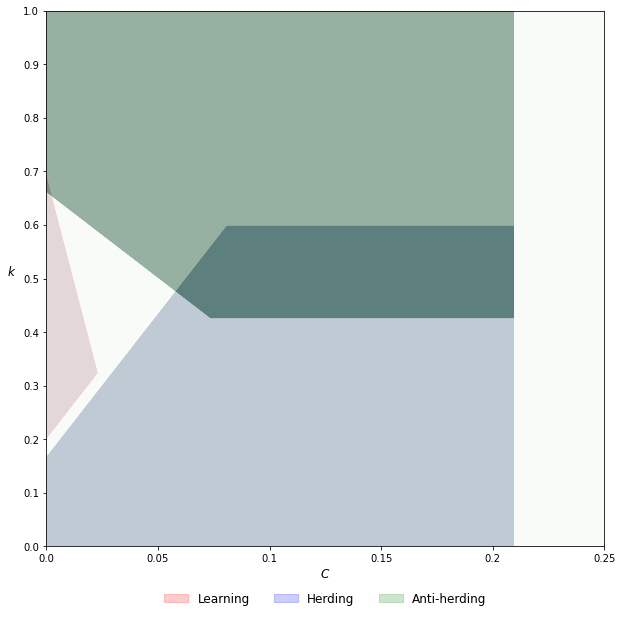

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(follow_signal(C, k, theta=theta), origin="lower", cmap="Reds", vmin=0.5, alpha=alpha);
ax.imshow(herd(C, k, theta=theta), origin="lower", cmap="Blues", vmin=0.5, alpha=alpha);
ax.imshow(anti_herd(C, k, theta=theta), origin="lower", cmap="Greens", vmin=0.5, alpha=alpha);
ax.set(xticks=np.linspace(C_min, C_n, 7), xticklabels=np.round(np.linspace(C_min, C_max, 7),3));
ax.set(yticks=np.linspace(k_min, k_n, 11), yticklabels=np.round(np.linspace(k_min, k_max, 11),2));

patches = [mpatches.Patch(color="red", alpha=alpha*0.5, label="Learning"),
           mpatches.Patch(color="blue", alpha=alpha*0.5, label="Herding"),
           mpatches.Patch(color="green", alpha=alpha*0.5, label="Anti-herding")]
ax.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.065), ncol=5, frameon=False, fontsize=fontsize);

ax.set_xlim(xmax=C_n*5/6)
ax.set_xlabel("$C$", fontsize=fontsize)
ax.set_ylabel("$k$     ", rotation=0, fontsize=fontsize)


plt.savefig('Figures/ParameterThreeway', dpi=300, bbox_inches='tight')

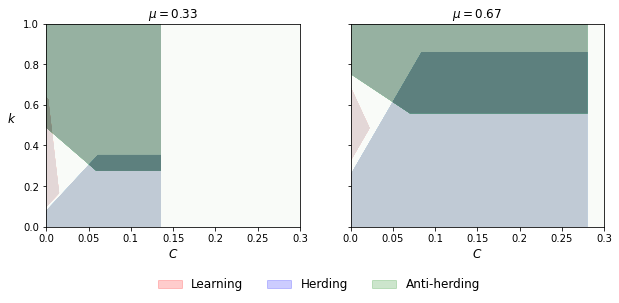

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7), sharey=True, sharex=True)

thetas = [1/3, 2/3]

ax1.imshow(follow_signal(C, k, theta=thetas[0]), origin="lower", cmap="Reds", vmin=0.5, alpha=alpha);
ax1.imshow(herd(C, k, theta=thetas[0]), origin="lower", cmap="Blues", vmin=0.5, alpha=alpha);
ax1.imshow(anti_herd(C, k, theta=thetas[0]), origin="lower", cmap="Greens", vmin=0.5, alpha=alpha);
ax1.set(xticks=np.linspace(C_min, C_n, 7), xticklabels=np.round(np.linspace(C_min, C_max, 7),2));
ax1.set(yticks=np.linspace(k_min, k_n, 6), yticklabels=np.round(np.linspace(k_min, k_max, 6),2));
ax1.set_ylabel("$k$     ", rotation=0, fontsize=fontsize)
ax1.set_xlabel("$C$", fontsize=fontsize)
ax1.set_title(f"$\mu={thetas[0]:.2f}$")

ax2.imshow(follow_signal(C, k, theta=thetas[1]), origin="lower", cmap="Reds", vmin=0.5, alpha=alpha);
ax2.imshow(herd(C, k, theta=thetas[1]), origin="lower", cmap="Blues", vmin=0.5, alpha=alpha);
ax2.imshow(anti_herd(C, k, theta=thetas[1]), origin="lower", cmap="Greens", vmin=0.5, alpha=alpha);
ax2.set(xticks=np.linspace(C_min, C_n, 7), xticklabels=np.round(np.linspace(C_min, C_max, 7),2));
ax2.set(yticks=np.linspace(k_min, k_n, 6), yticklabels=np.round(np.linspace(k_min, k_max, 6),2));
ax2.set_xlabel("$C$", fontsize=fontsize)
ax2.set_title(f"$\mu={thetas[1]:.2f}$")
# ax2.set_xlim(xmax=2.5)

# ax3.imshow(follow_signal(C, k, theta=thetas[2]), origin="lower", cmap="Reds", vmin=0.5, alpha=alpha);
# ax3.imshow(herd(C, k, theta=thetas[2]), origin="lower", cmap="Blues", vmin=0.5, alpha=alpha);
# ax3.imshow(anti_herd(C, k, theta=thetas[2]), origin="lower", cmap="Greens", vmin=0.5, alpha=alpha);
# ax3.set(xticks=np.linspace(C_min, C_n, 5), xticklabels=np.round(np.linspace(C_min, C_max, 5),2));
# ax3.set(yticks=np.linspace(k_min, k_n, 6), yticklabels=np.round(np.linspace(k_min, k_max, 6),2));
# ax3.set_xlabel("$C$", fontsize=fontsize)
# ax3.set_title(f"$\\theta={thetas[2]:.2f}$")

patches = [mpatches.Patch(color="red", alpha=alpha*0.5, label="Learning"),
           mpatches.Patch(color="blue", alpha=alpha*0.5, label="Herding"),
           mpatches.Patch(color="green", alpha=alpha*0.5, label="Anti-herding")]

ax2.legend(handles=patches, loc='upper center', bbox_to_anchor=(-0.125, -0.2), ncol=5, frameon=False, fontsize=fontsize);

plt.savefig('Figures/ParameterThreewayVarTheta', dpi=300, bbox_inches='tight')

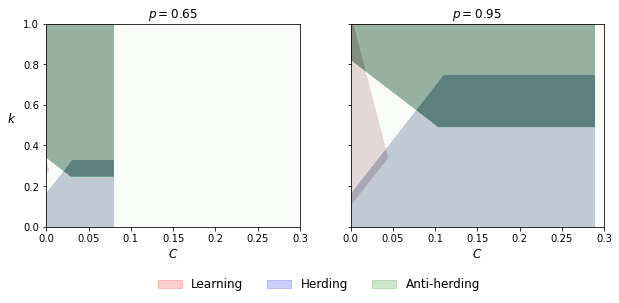

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7), sharey=True, sharex=True)

p_values = [0.65, 0.95]

ax1.imshow(follow_signal(C, k, p=p_values[0]), origin="lower", cmap="Reds", vmin=0.5, alpha=alpha);
ax1.imshow(herd(C, k, p=p_values[0]), origin="lower", cmap="Blues", vmin=0.5, alpha=alpha);
ax1.imshow(anti_herd(C, k, p=p_values[0]), origin="lower", cmap="Greens", vmin=0.5, alpha=alpha);
ax1.set(xticks=np.linspace(C_min, C_n, 7), xticklabels=np.round(np.linspace(C_min, C_max, 7),2));
ax1.set(yticks=np.linspace(k_min, k_n, 6), yticklabels=np.round(np.linspace(k_min, k_max, 6),2));
ax1.set_ylabel("$k$     ", rotation=0, fontsize=fontsize)
ax1.set_xlabel("$C$", fontsize=fontsize)
ax1.set_title(f"$p={p_values[0]:.2f}$")

ax2.imshow(follow_signal(C, k, p=p_values[1]), origin="lower", cmap="Reds", vmin=0.5, alpha=alpha);
ax2.imshow(herd(C, k, p=p_values[1]), origin="lower", cmap="Blues", vmin=0.5, alpha=alpha);
ax2.imshow(anti_herd(C, k, p=p_values[1]), origin="lower", cmap="Greens", vmin=0.5, alpha=alpha);
ax2.set(xticks=np.linspace(C_min, C_n, 7), xticklabels=np.round(np.linspace(C_min, C_max, 7),2));
ax2.set(yticks=np.linspace(k_min, k_n, 6), yticklabels=np.round(np.linspace(k_min, k_max, 6),2));
ax2.set_xlabel("$C$", fontsize=fontsize)
ax2.set_title(f"$p={p_values[1]:.2f}$")

# ax3.imshow(follow_signal(C, k, p=p_values[2]), origin="lower", cmap="Reds", vmin=0.5, alpha=alpha);
# ax3.imshow(herd(C, k, p=p_values[2]), origin="lower", cmap="Blues", vmin=0.5, alpha=alpha);
# ax3.imshow(anti_herd(C, k, p=p_values[2]), origin="lower", cmap="Greens", vmin=0.5, alpha=alpha);
# ax3.set(xticks=np.linspace(C_min, C_n, 5), xticklabels=np.round(np.linspace(C_min, C_max, 5),2));
# ax3.set(yticks=np.linspace(k_min, k_n, 6), yticklabels=np.round(np.linspace(k_min, k_max, 6),2));
# ax3.set_xlabel("$C$", fontsize=fontsize)
# ax3.set_title(f"$p={p_values[2]:.2f}$")

patches = [mpatches.Patch(color="red", alpha=alpha*0.5, label="Learning"),
           mpatches.Patch(color="blue", alpha=alpha*0.5, label="Herding"),
           mpatches.Patch(color="green", alpha=alpha*0.5, label="Anti-herding")]

ax2.legend(handles=patches, loc='upper center', bbox_to_anchor=(-0.125, -0.2), ncol=5, frameon=False, fontsize=fontsize);

plt.savefig('Figures/ParameterThreewayVarP', dpi=300, bbox_inches='tight')